C:\Users\lucac\AppData\Local\Temp\ipykernel_33992\2867669633.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consumption_corr.values, y=consumption_corr.index, palette="coolwarm")


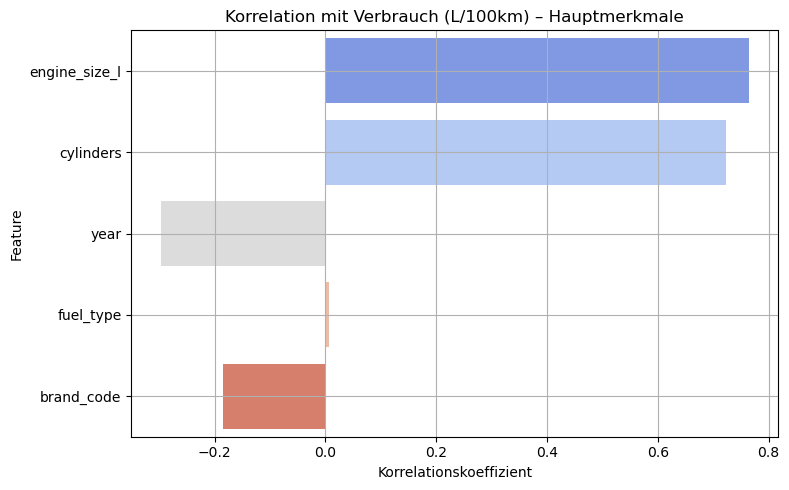

C:\Users\lucac\AppData\Local\Temp\ipykernel_33992\2867669633.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extreme_brands.values, y=extreme_brands.index, palette="coolwarm")


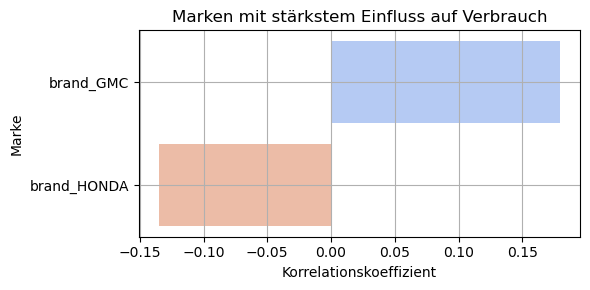

✅ Höchste positive Korrelation (Marke):
brand_GMC    0.179464
Name: consumption_l_per_100km, dtype: float64 

✅ Höchste negative Korrelation (Marke):
brand_HONDA   -0.135032
Name: consumption_l_per_100km, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV laden (Pfad ggf. anpassen)
df = pd.read_csv("data/fuel_combined.csv")

# --------------------------------------
# 🔹 TEIL 1: Hauptmerkmale als Ganzes
# --------------------------------------

# Nur relevante Spalten auswählen
df_main = df[["engine_size_l", "cylinders", "year", "fuel_type", "brand", "consumption_l_per_100km"]].copy()

# Kategorische Variablen als numerische Codes umwandeln
df_main["fuel_type"] = df_main["fuel_type"].astype("category").cat.codes
df_main["brand_code"] = df_main["brand"].astype("category").cat.codes

# Nur numerische Spalten für Korrelation
main_corr = df_main[["engine_size_l", "cylinders", "year", "fuel_type", "brand_code", "consumption_l_per_100km"]].corr()

# Korrelation mit Verbrauch extrahieren
consumption_corr = main_corr["consumption_l_per_100km"].drop("consumption_l_per_100km")

# Visualisierung
plt.figure(figsize=(8, 5))
sns.barplot(x=consumption_corr.values, y=consumption_corr.index, palette="coolwarm")
plt.title("Korrelation mit Verbrauch (L/100km) – Hauptmerkmale")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()

# --------------------------------------
# 🔹 TEIL 2: Einflussreichste Marken
# --------------------------------------

# One-Hot-Encoding auf brand (nur für diesen Teil!)
df_encoded = pd.get_dummies(df[["brand", "consumption_l_per_100km"]], columns=["brand"], drop_first=True)

# Korrelation aller brand-Spalten mit Verbrauch
brand_corr = df_encoded.corr()["consumption_l_per_100km"]
brand_corr = brand_corr[brand_corr.index.str.startswith("brand_")]

# Höchste positive und höchste negative Korrelation
top_brand = brand_corr.sort_values(ascending=False).head(1)
low_brand = brand_corr.sort_values().head(1)

# Kombinieren und visualisieren
extreme_brands = pd.concat([top_brand, low_brand])

plt.figure(figsize=(6, 3))
sns.barplot(x=extreme_brands.values, y=extreme_brands.index, palette="coolwarm")
plt.title("Marken mit stärkstem Einfluss auf Verbrauch")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Marke")
plt.tight_layout()
plt.grid(True)
plt.show()

# Optional ausgeben
print("✅ Höchste positive Korrelation (Marke):")
print(top_brand, "\n")
print("✅ Höchste negative Korrelation (Marke):")
print(low_brand)
